Alexander Hyde<br>
Phys 434 AB<br>
Homework 5

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (12,8)

**1a.**

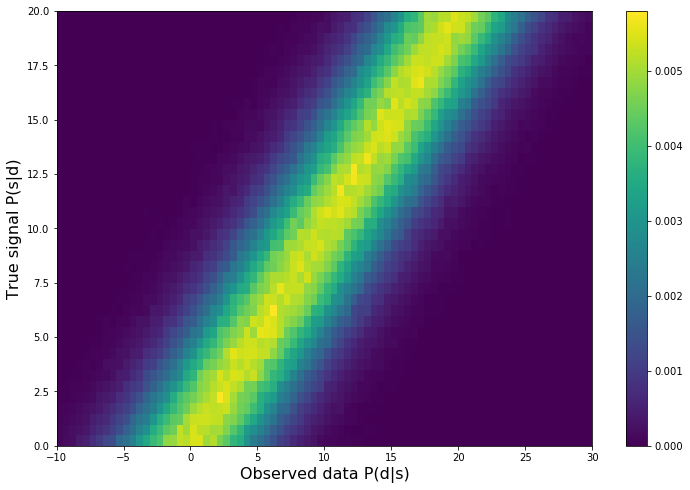

In [114]:
bkgd = stats.norm.rvs(0,3.7,1000000)
signal = stats.uniform.rvs(0,20,1000000)
data = bkgd + signal

plt.subplots(1,1)
signalBins = np.linspace(0,20,41)
dataBins = np.linspace(-10,30,81)
plt.hist2d(data,signal,bins=[dataBins,signalBins],density=True)
plt.colorbar()
plt.xlabel("Observed data P(d|s)",fontsize=16)
plt.ylabel("True signal P(s|d)",fontsize=16)
plt.show()

**1b.**

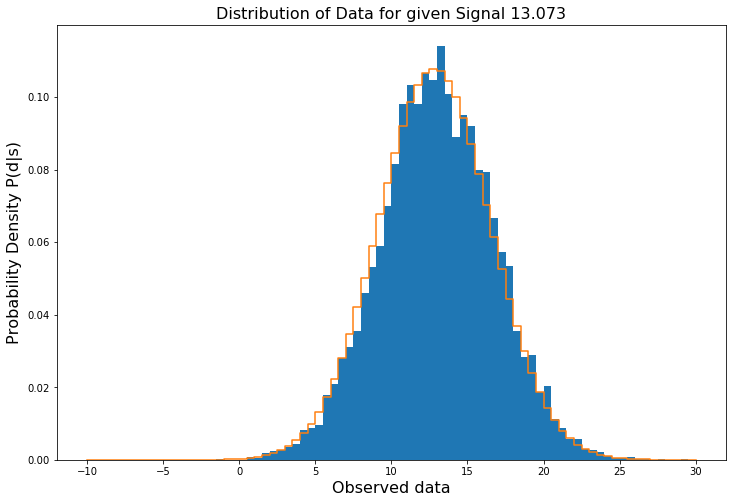

Mean Observed Data: 13.0337797738034


In [115]:
sig = signal[5000] # arbitrary signal choice

def sliceSignal(s):
    s_d = []
    for i in range(len(signal)):
        if (s-0.1)<=signal[i] and signal[i]<(s+0.1):
            s_d.append(data[i])
    return s_d

sData = sliceSignal(sig)
plt.subplots(1,1)
plt.hist(sData,bins=np.linspace(-10,30,81),density=True)
plt.title("Distribution of Data for given Signal " + str(np.round(sig,3)),fontsize=16)
plt.xlabel("Observed data",fontsize=16)
plt.ylabel("Probability Density P(d|s)",fontsize=16)

od = np.linspace(-10,30,81)
Pds = stats.norm.pdf(np.add(od,-sig),0,3.7)
plt.step(od,Pds,where="pre")
plt.show()

print("Mean Observed Data: " + str(sum(sData)/len(sData)))

This is a histogram of what data could've been observed when the machinery reading the data gets true signals within 0.1 distance of the chosen signal. As you'd expect, the mean of this distribution is fairly close to the true signal, but that's because the pdf of getting a certain data reading from a given signal is centered on 0. If there were infinite samples, the mean of this histogram would perfectly match the chosen signal.<br>

I also added a Gaussian pdf based on the background data, which represents the same pdf I just described, but only for the exact true signal, not all signals within 0.1 distance of the true signal.<br>

**1c.**

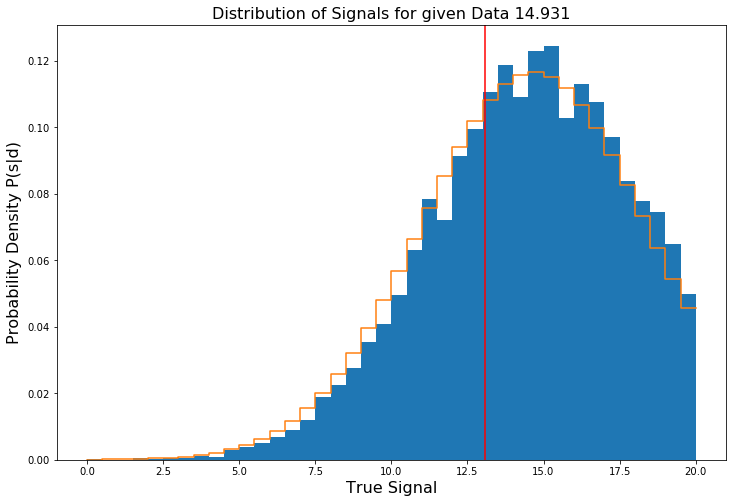

Mean True Signal: 14.352327049887846


In [117]:
dat = data[5000] # arbitrary data choice

def sliceData(s):
    s_s = []
    for i in range(len(data)):
        if (s-0.1)<=data[i] and data[i]<(s+0.1):
            s_s.append(signal[i])
    return s_s

sSignal = sliceData(dat)
plt.subplots(1,1)
plt.hist(sSignal,bins=np.linspace(0,20,41),density=True)
plt.title("Distribution of Signals for given Data " + str(np.round(dat,3)),fontsize=16)
plt.xlabel("True Signal",fontsize=16)
plt.ylabel("Probability Density P(s|d)",fontsize=16)

ts = np.linspace(0,20,41)
Psd = np.multiply(stats.norm.pdf(np.add(dat,-ts),0,3.7),stats.uniform.pdf(ts,0,20))
Psd = Psd / (0.5*sum(Psd)) # Normalized by 0.5*sum(Psd) since Psd adds half-increment points.
plt.step(ts,Psd,where="pre")
plt.axvline(x=sig,color="Red")
plt.show()

print("Mean True Signal: " + str(sum(sSignal)/len(sSignal)))

This is a histogram of the true signals that were tied to data readings within a 0.1 range of a chosen data reading. Again, the mean of this distribution is close to the data reading that I chose.<br>

The pdf I overlayed on top of the histogram this time is different, I used Bayes Theorem to calculate the probability of having seen a true signal based on the one data point that was read.<br>

Note that the red line is the true signal associated to the data point that I took.

**2.**

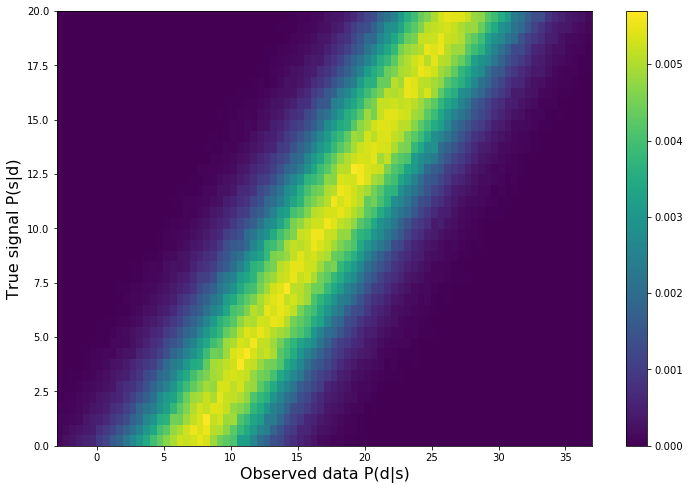

In [118]:
bkgd = stats.norm.rvs(7,3.7,1000000)
signal = stats.uniform.rvs(0,20,1000000)
data = bkgd + signal

plt.subplots(1,1)
signalBins = np.linspace(0,20,41)
dataBins = np.linspace(-3,37,81)
plt.hist2d(data,signal,bins=[dataBins,signalBins],density=True)
plt.colorbar()
plt.xlabel("Observed data P(d|s)",fontsize=16)
plt.ylabel("True signal P(s|d)",fontsize=16)
plt.show()

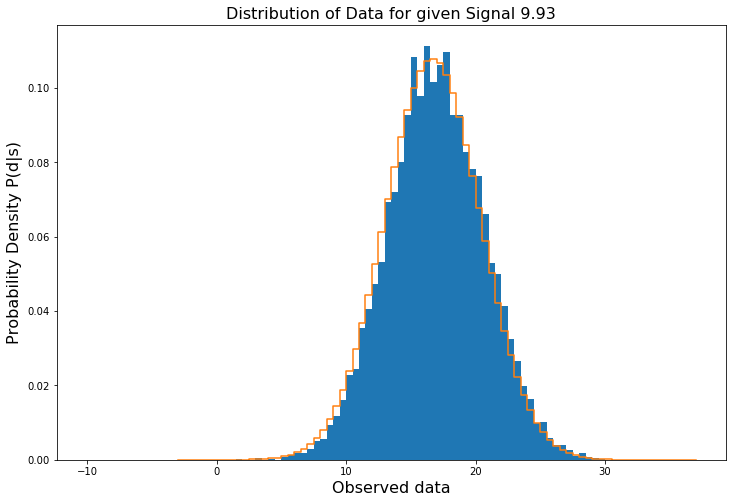

Mean Observed Data: 16.96668194641949


In [119]:
sig = signal[5000] # arbitrary signal choice

def sliceSignal(s):
    s_d = []
    for i in range(len(signal)):
        if (s-0.1)<=signal[i] and signal[i]<(s+0.1):
            s_d.append(data[i])
    return s_d

sData = sliceSignal(sig)
plt.subplots(1,1)
plt.hist(sData,bins=np.linspace(-10,30,81),density=True)
plt.title("Distribution of Data for given Signal " + str(np.round(sig,3)),fontsize=16)
plt.xlabel("Observed data",fontsize=16)
plt.ylabel("Probability Density P(d|s)",fontsize=16)

od = np.linspace(-3,37,81)
Pds = stats.norm.pdf(np.add(od,-sig),7,3.7)
plt.step(od,Pds,where="pre")
plt.show()

print("Mean Observed Data: " + str(sum(sData)/len(sData)))

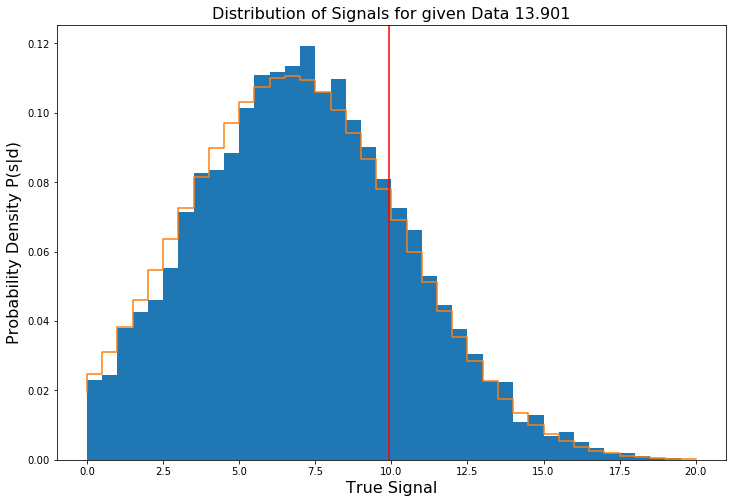

Mean True Signal: 7.140513252163961


In [120]:
dat = data[5000] # arbitrary data choice

def sliceData(s):
    s_s = []
    for i in range(len(data)):
        if (s-0.1)<=data[i] and data[i]<(s+0.1):
            s_s.append(signal[i])
    return s_s

sSignal = sliceData(dat)
plt.subplots(1,1)
plt.hist(sSignal,bins=np.linspace(0,20,41),density=True)
plt.title("Distribution of Signals for given Data " + str(np.round(dat,3)),fontsize=16)
plt.xlabel("True Signal",fontsize=16)
plt.ylabel("Probability Density P(s|d)",fontsize=16)

ts = np.linspace(0,20,41)
Psd = np.multiply(stats.norm.pdf(np.add(dat,-ts),7,3.7),stats.uniform.pdf(ts,0,20))
Psd = Psd / (0.5*sum(Psd)) # Normalized by 0.5*sum(Psd) since Psd adds half-increment points.
plt.step(ts,Psd,where="pre")
plt.axvline(x=sig,color="Red")
plt.show()

print("Mean True Signal: " + str(sum(sSignal)/len(sSignal)))

In this scenario, the background has the same standard deviation but now has an mean of 7. That means that the precision of the data is still the same, but the data will on average be 7 above the signal. This can be seen in the P(d|s) plot as the mean of the observed data was 7 above the true signal for it, and it can be seen in the P(s|d) plot where its mean is 7 below the data point chosen for it. You can effectively think of the data readings as being the signal + 7 + the data inprecision, and the signal readings as being the data - 7 + the signal inprecision.<br>

Regularly, the 7 in this case is referred to as systematic error. If you're trying to measure a 10 cm distance with a ruler that's had 1 added to every cm marking, then you'll measure on average 11 cm as the distance, even after infinity measurements. Imprecision on the other hand will be the same for a ruler that has 1 added to its markings or not, since the mm mark that you read the distance off at will always randomly vary between measurements.